# SI618 Lab 9

In this lab, we will be working with three different datasets

1. The UCI data set about wine quality from lab 8. The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. Selected gender inequality related data from global development database downloaded from the World Bank data bank (https://databank.worldbank.org/reports.aspx?source=world-development-indicators#). Read the metadata file for more information about the two variables being used.
3. A  time series dataset of the Apple Stock Prices for one decade 2010 - 2020 in the United States collected from https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

## Part 1: Wine Quality

### Question 1: (15 points) Load the wine quality dataset. Define a new column **isgood** based on the **quality** column with wines with a quality rating higher than 5 being *good* and the rest being *bad*.

  * Use a JointGrid approach look at the relationship between sulphates and alcohol.
  * Look at the same relationship separately for *good* and *bad* wines with separate JointGrids
  * What do you observe? 

Hint: Where appropriate create additional figures that allow you to exclude the effect of outliers

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


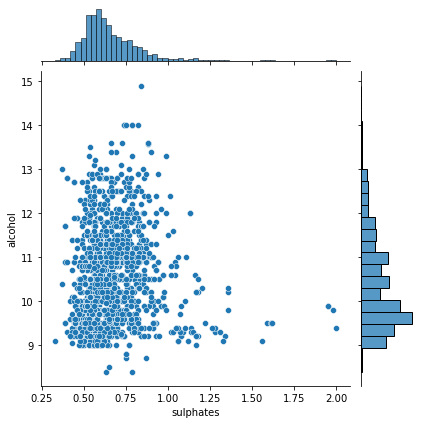

In [3]:
# Q1-1
ax = sns.JointGrid(data=wine, x="sulphates", y="alcohol")
ax.plot(sns.scatterplot, sns.histplot)

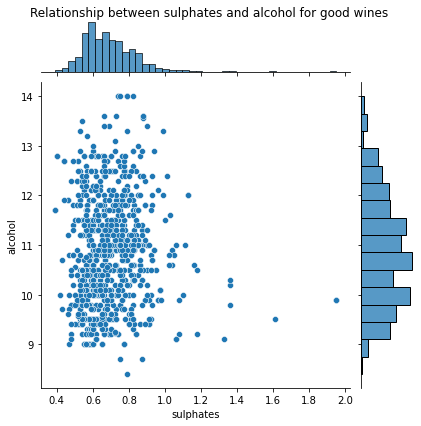

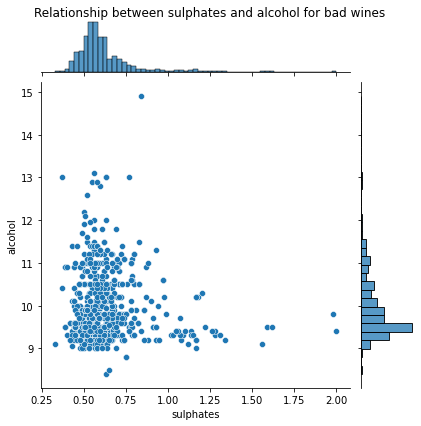

In [4]:
# Q1-2
ax1 = sns.JointGrid(data=wine[wine['isgood']=='good'], x="sulphates", y="alcohol")
ax1.plot(sns.scatterplot, sns.histplot)
ax1.fig.suptitle("Relationship between sulphates and alcohol for good wines")
ax1.fig.subplots_adjust(top=0.95)

ax2 = sns.JointGrid(data=wine[wine['isgood']=='bad'], x="sulphates", y="alcohol")
ax2.plot(sns.scatterplot, sns.histplot)
ax2.fig.suptitle("Relationship between sulphates and alcohol for bad wines")
ax2.fig.subplots_adjust(top=0.95)

\# Q1-3

From the plot in Q1-1, we can find that:
- There is no obvious relationship between the two variables. When one variable changes, the distribution of the values of the other variable does not change particularly significantly.

From the plots in Q1-2, we can find that:
- Good wine genereally has higher amount of alcohol in wine.
- The sulphates are almost the same in both good wines and bad wines
- Good wines have a more even distribution of both sulfate and alcohol than bad wines.

### Question 2: (15 points) Use OLS to perform either a regression or an ANOVA for the relationship between alcohol with (i) categorical variable of wine quality and (ii) original quality. Interpret your results.

In [5]:
# Q2-(i)
model1 = smf.ols('alcohol ~ C(isgood)', data=wine).fit() # categorical variable of wine quality
print(model1.summary())
aov_table1 = sm.stats.anova_lm(model1, typ=2)
print(aov_table1)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     372.2
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.02e-74
Time:                        18:08:29   Log-Likelihood:                -2202.6
No. Observations:                1599   AIC:                             4409.
Df Residuals:                    1597   BIC:                             4420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.9265      0.03

In [6]:
# Q2-(ii)
model2 = smf.ols('alcohol ~ quality', data=wine).fit() # original quality
print(model2.summary())
aov_table2 = sm.stats.anova_lm(model2, typ=2)
print(aov_table2)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.83e-91
Time:                        18:08:29   Log-Likelihood:                -2164.5
No. Observations:                1599   AIC:                             4333.
Df Residuals:                    1597   BIC:                             4344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8816      0.165     41.625      0.0

#### Interpretation

From the tables above, we can find that:
- Since the values of R square are relatively close to 0 for both models, we can say that the linear model does not fit this two varibales well
- For both models, the p-values of slope and intercept are very small and less than 0.05, indicating that both independent varibles (`isgood` and `quality`) make an influence on the deviation of dependent variable `sulphates`

## Part 2: Trends in Gender Inequality

In [7]:
gender = pd.read_csv('gender_world_development.csv')
gender.head()

,Unnamed: 0,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,0,Afghanistan,AFG,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
1,4,Afghanistan,AFG,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,...,28.750000,28.750000,28.750000,28.750000,28.750000,38.125000,38.125000,38.125000,38.125000,38.125000
2,13,Albania,ALB,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
3,17,Albania,ALB,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,...,85.625000,85.625000,85.625000,85.625000,85.625000,91.250000,91.250000,91.250000,91.250000,91.250000
4,26,Algeria,DZA,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,7.969152,31.601732,31.601732,31.601732,31.601732,31.601732,25.757576,25.757576,25.757576,25.757576


### Question 3: (15 points) Visualize the relationship between the representation of women in the parliment (*SG.GEN.PARL.ZS*) and the legal and regulatory support for providing economic opportunities for women (*SG.LAW.INDX*) in the year 2020 using a scatter plot drawn with plotnine (*geom_point*). Then overlay a linear regression fit with the standard error confidence intervals on the same plot (*geom smooth*). Remember to label and resize the figure as necessary to make it readable. What do you observe?   

/Users/junsi/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


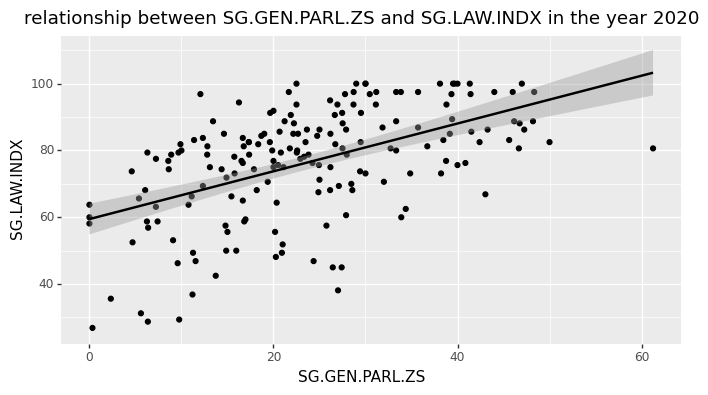

<ggplot: (8791235204849)>

In [8]:
# extract the aiming data
gender_zs_2020 = gender[gender["Series Code"] == "SG.GEN.PARL.ZS"][["Country Code", "2020 [YR2020]"]].rename(columns= {"2020 [YR2020]": "SG.GEN.PARL.ZS"})
gender_indx_2020 = gender[gender["Series Code"] == "SG.LAW.INDX"][["Country Code", "2020 [YR2020]"]].rename(columns= {"2020 [YR2020]": "SG.LAW.INDX"})
gender_2020 = pd.merge(left=gender_zs_2020,right=gender_indx_2020,on="Country Code")

# plot with plotnine
(ggplot(gender_2020, aes('SG.GEN.PARL.ZS', 'SG.LAW.INDX')) + geom_point() + geom_smooth(method='lm') + \
    theme(figure_size=(8, 4)) + \
    ggtitle("relationship between SG.GEN.PARL.ZS and SG.LAW.INDX in the year 2020"))

#### Observation

From the plot above, we can find that:
- there exist a positive linear relationship between the two variables in the year 2020
- the correlation between the two variables will not be low since the points are all around the linear regression line which indicates a relatively good fitting.

### Question 4: (10 points) Visualize the evolution of the proportion of women in the legislature in the United States and the legal and regulatory support for providing economic opportunities for women over the years using a line plot. You should add one line for each feature over the years. State any patterns you find in this plot. Remember to format the figure for readibility.

Hint: You can use the pandas *melt* function to convert columns to rows

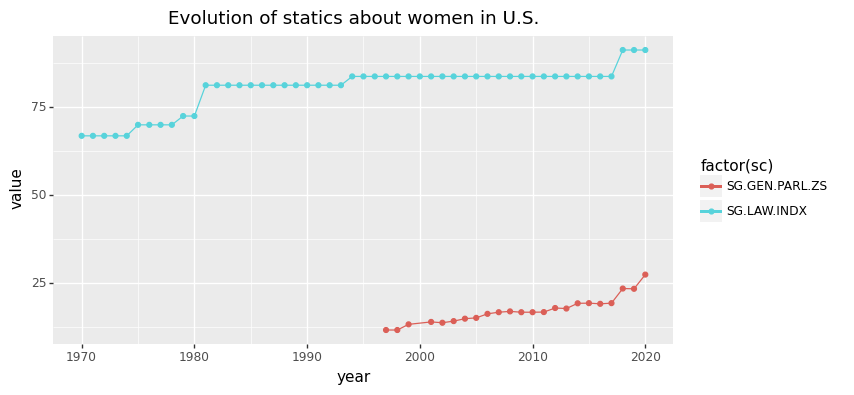

<ggplot: (8791228052179)>

In [9]:
# data manipulation
gender_usa = pd.melt(gender[gender["Country Code"] == "USA"],id_vars=["Country Name", "Country Code", "Series Code"],value_vars=gender[gender["Country Code"] == "USA"].columns[5:])
gender_usa["year"] = [int(year[:4]) for year in gender_usa["variable"]]
gender_usa = gender_usa.dropna().rename(columns = {"Series Code": "sc"})

# line plot
ggplot(gender_usa, aes('year', 'value', group = 'sc')) + theme(figure_size=(8, 4)) + \
  geom_line(aes(color = 'factor(sc)')) + geom_point(aes(color = 'factor(sc)')) +\
  ggtitle("Evolution of statics about women in U.S.")

#### Observation
From the plot above, we can find that:
- there is a very clear upward trend in the proportion of women in the legislature in the United States over the years
- the overall trend for the legal and regulatory support for providing economic opportunities for women over the years is upward over the years, but there are several periods in which the proportion has not changed.

### Question 5: (20 points) Create visualizations for the 10 most populus countries in the world (China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico) using a facet grid from plotnine - use one facet grid for the proportion of women in legislature and one facet grid for the legal and regulatory support for providing economic opportunities for women. Remember to format the figure for reability. What are your observations?

In [10]:
# data manipulation
pop_country_list = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']
gender_10 = gender[gender["Country Name"].isin(pop_country_list)]
gender_melt_10 = pd.melt(gender_10, id_vars=["Country Name", "Country Code", "Series Code"], value_vars=gender_10.columns[5:])
gender_melt_10["year"] = [int(year[:4]) for year in gender_melt_10["variable"]]
gender_melt_10 = gender_melt_10.dropna()
gender_melt_10_zs = gender_melt_10[gender_melt_10["Series Code"] == "SG.GEN.PARL.ZS"]
gender_melt_10_indx = gender_melt_10[gender_melt_10["Series Code"] == "SG.LAW.INDX"]

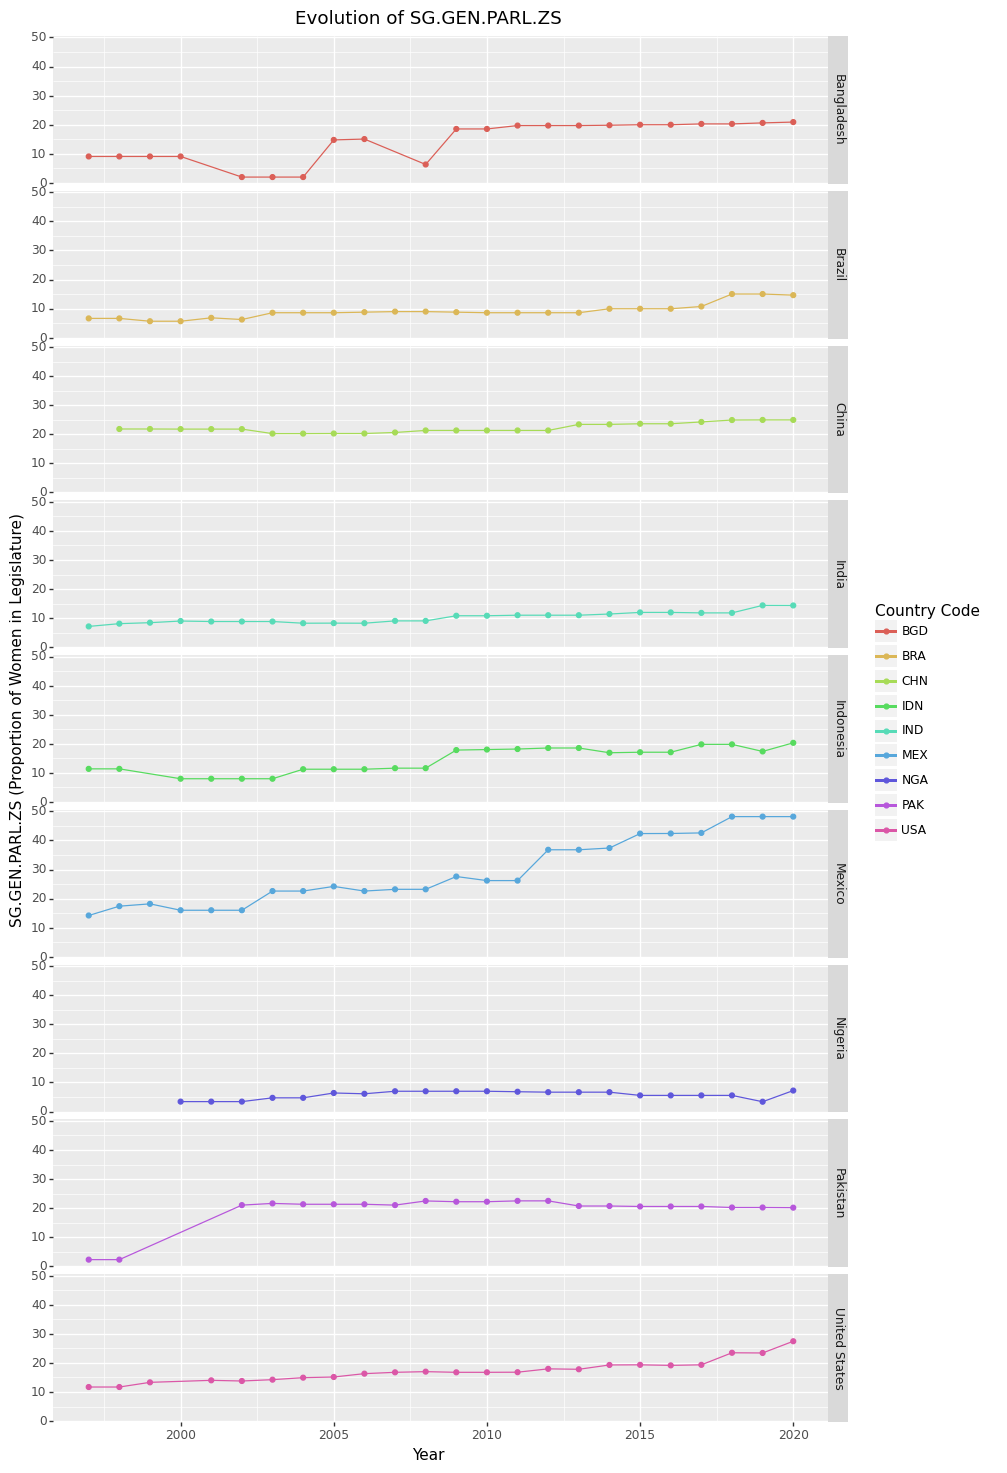

<ggplot: (8791234304588)>

In [11]:
ggplot(gender_melt_10_zs, aes(x='year', y='value')) + \
    geom_line(aes(color = 'Country Code')) + \
    geom_point(aes(color = 'Country Code')) + \
    facet_grid('Country Name ~ .') + \
    labs(x='Year', y='SG.GEN.PARL.ZS (Proportion of Women in Legislature)') + \
    theme(figure_size=(10, 18)) + \
    ggtitle("Evolution of SG.GEN.PARL.ZS")

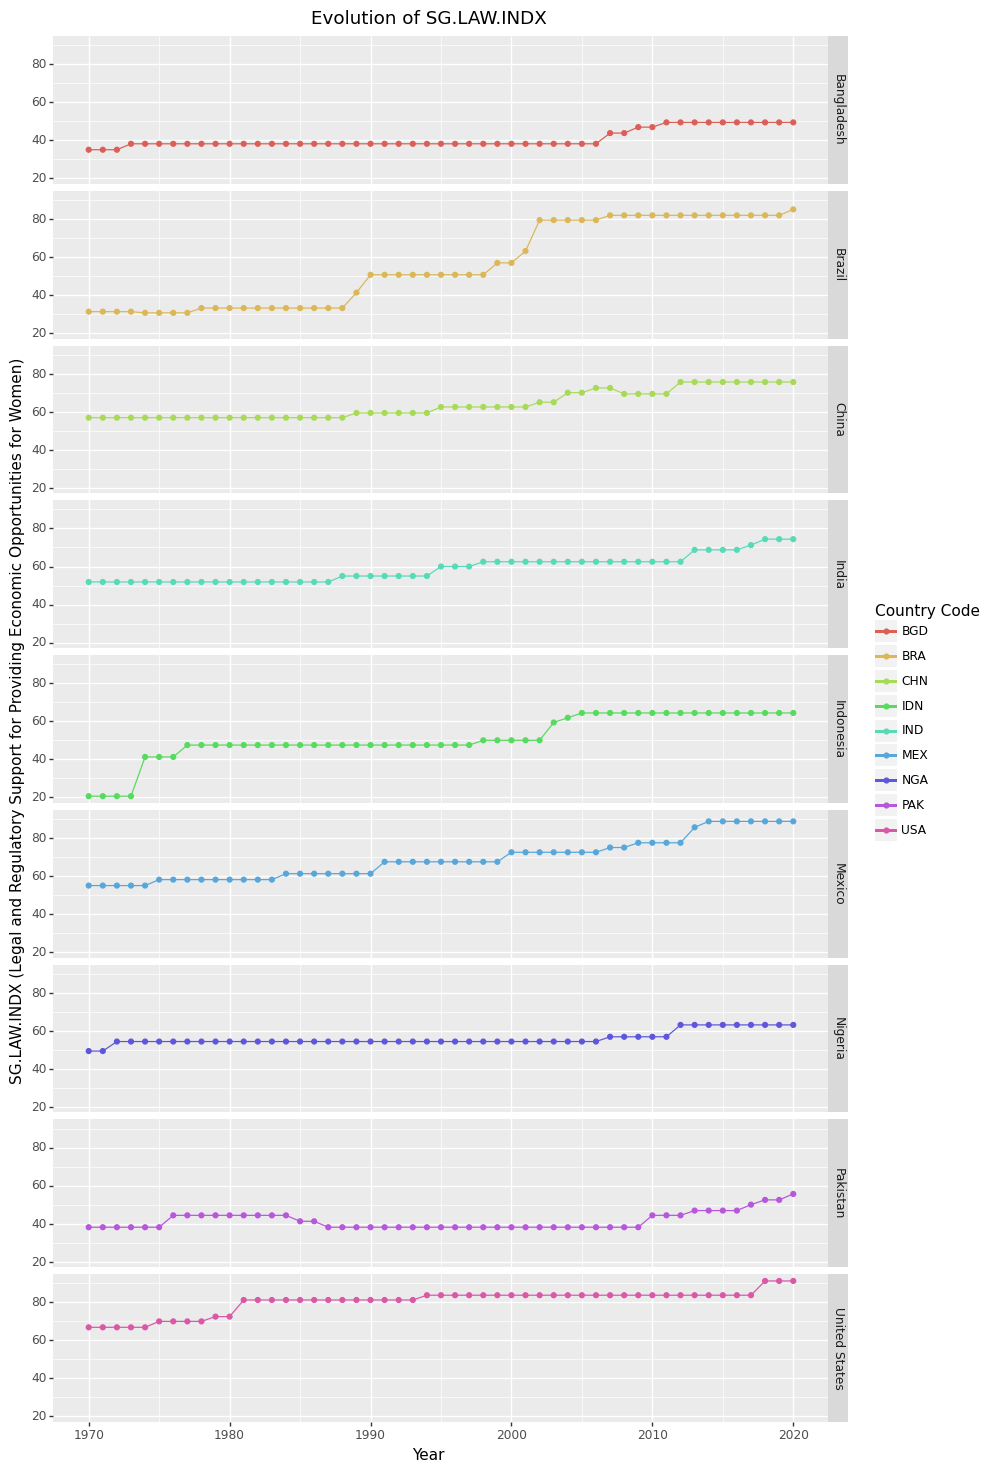

<ggplot: (8791236804949)>

In [12]:
ggplot(gender_melt_10_indx, aes(x='year', y='value')) + \
    geom_line(aes(color = 'Country Code')) + \
    geom_point(aes(color = 'Country Code')) + \
    facet_grid('Country Name ~ .') + \
    labs(x='Year', y='SG.LAW.INDX (Legal and Regulatory Support for Providing Economic Opportunities for Women)') + \
    theme(figure_size=(10, 18)) +\
    ggtitle("Evolution of SG.LAW.INDX")

#### Observation
From the plots above for the proportion of women in the legislature, we can find that:
- In all 10 countries, the proportion of women in the legislature appears to have an increasing trendency over the years.
- Among all 10 most populous countries, the one with fastest growth in proportion is Maxico. While in China, Inida and Nigeria, the proportion growth was slow, even stay steady.


From the plots above for the legal and regulatory support for providing economic opportunities for women, we can find that:
- In all 10 countries except Pakistan, the legal and regulatory support for providing economic opportunities for women appears to have an increasing trendency over the years.
- Among 9 countries which have an incresing tendency, the one with fastest growth is Brazil. While in Bangladesh and Nigeria, the proportion growth was slow, even stay steady.
- In Pakistan, the legal and regulatory support for providing economic opportunities for women drops between 1984 and 1987, then increases.

## Part 3: Apple Stock Close Prices

### Question 6: (10 points) Load the apple stock prices dataset. Filter out only the data from 2017 and after. Using plotnine, visualize the time series of the close price with overlayed point and line plots. Format and label the plot to be readable.

Hint: You can use the mizani package to generate the axis breaks and formatted labels

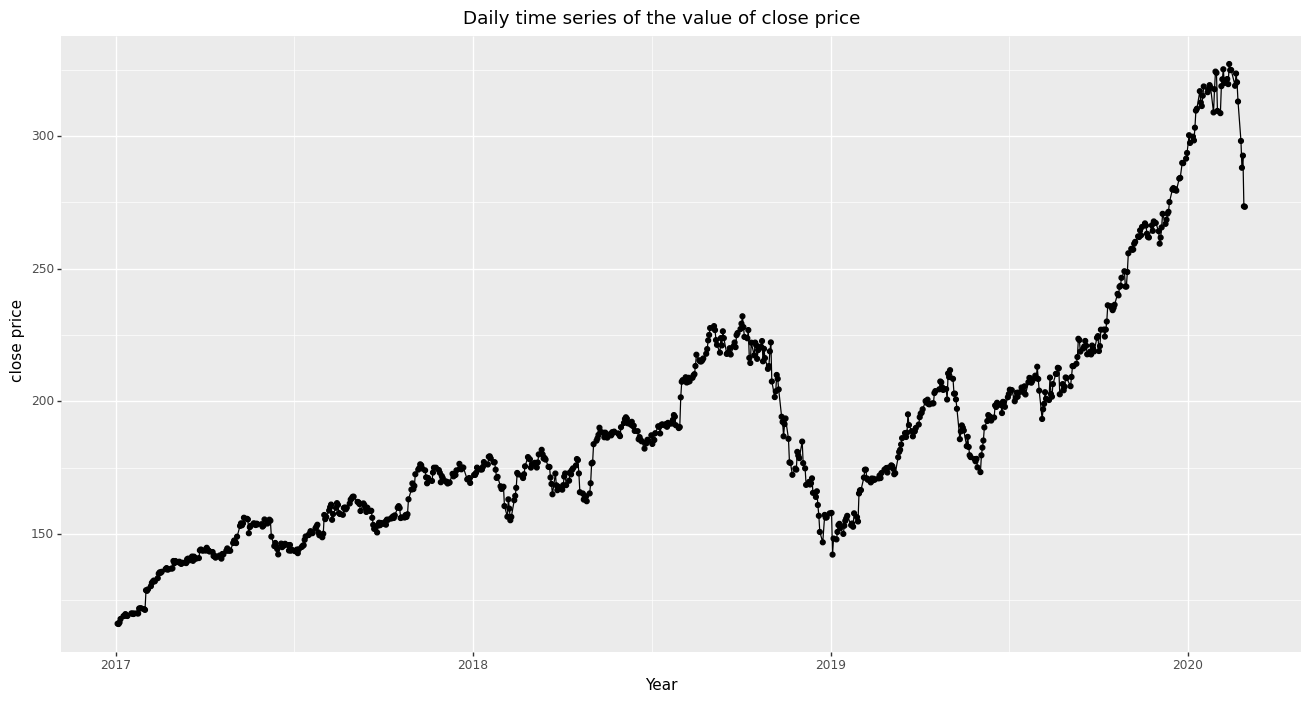

<ggplot: (8791204320127)>

In [13]:
apple = pd.read_csv('Apple Stock Prices.csv').rename(columns = {" Close/Last" :"Close"})
apple['time'] = pd.to_datetime(apple['Date'])
apple['year'] = apple["time"].dt.year
apple['month'] = apple["time"].dt.month
apple['day'] = apple["time"].dt.day
apple['close_price'] = apple["Close"].str.replace('$', '', regex = True).astype(float)
apple = apple[apple["year"] >= 2017]

# plot
ggplot(apple, aes(x='time', y='close_price')) + \
    geom_point() + geom_line() + \
    scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y')) + \
    labs(x='Year', y='close price') + \
    ggtitle("Daily time series of the value of close price") + \
    theme(figure_size=(16, 8))

### Question 7: (15 points) Remove the monthly seasonal effect from the close prices and plot the adjusted close price (mean + residual) time series. What do you observe? 

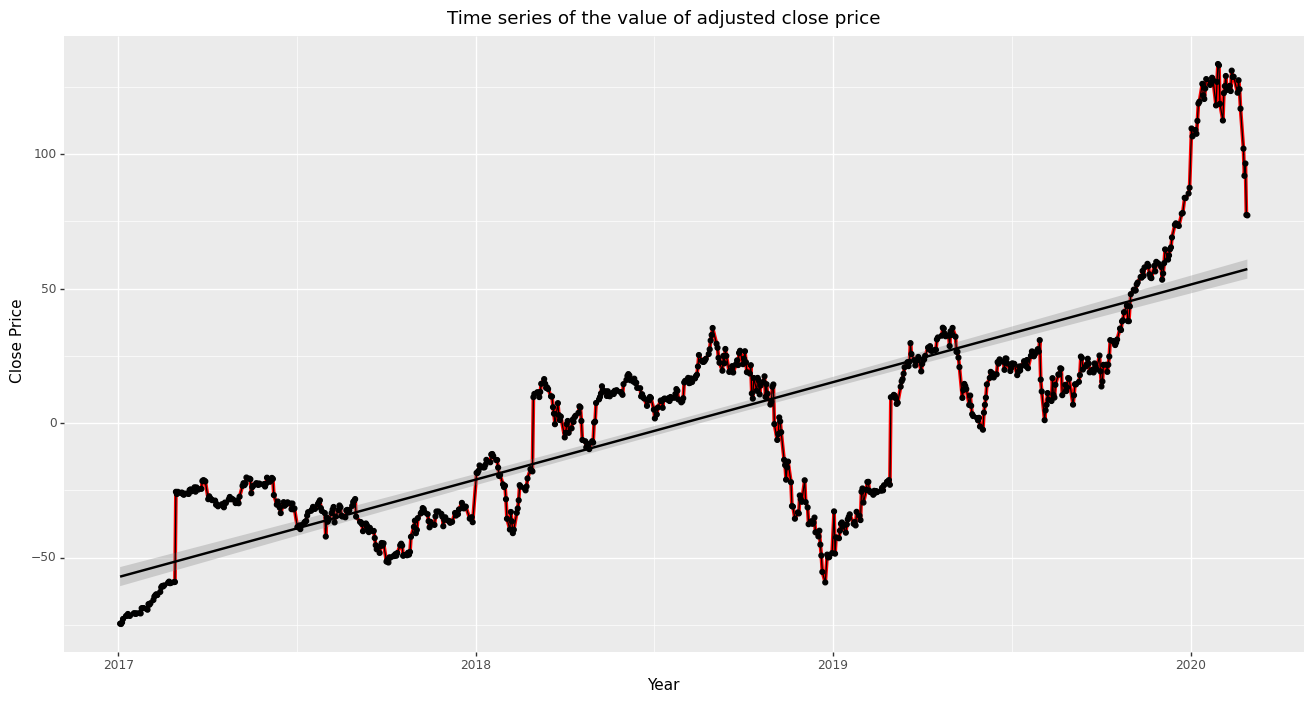

<ggplot: (8791205582586)>

In [14]:
model = smf.ols('close_price ~ C(month)', data=apple).fit()
apple['close_resid'] =  model.resid
apple['close_adjusted'] = apple['close_price'].mean() + model.resid

# plot
avg = stat_summary(aes(group = 1), fun_y = np.mean, geom = "line", colour = "red", size = 1.5, na_rm = True) 
line = geom_smooth(aes(group = 1),method='lm')

ggplot(apple, aes('time', 'close_resid')) + avg + line + \
  ggtitle("Time series of the value of adjusted close price") + \
  geom_line() + geom_point() +\
  scale_x_datetime(breaks=date_breaks('1 years'), labels=date_format('%Y')) + \
  labs(x='Year', y='Close Price') + \
  theme(figure_size=(16, 8))


After removing the monthly seasonal effect from the close price, we can find from the plot above that:
- The adjusted close price has an overall increasing tendencey from 2017 to 2020.
- The number and magnitude of the close price fluctuations are greater than that before removing the monthly seasonal effect.
- There are more steep rise and fall. Besides, there is a sudden drop in the end of 2018, indicating there maybe an event that affect Apple's price.

**Turn in uniqname_si618_lab9.ipynb and uniqname_si618_lab9.html through canvas**